In [2]:
!pip install scikit-learn
!pip  install pandas

In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

LOAD AND READ DATASET

In [3]:
train_data = pd.read_csv("/content/fraudTrain.csv")

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11706 entries, 0 to 11705
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             11706 non-null  int64  
 1   trans_date_trans_time  11706 non-null  object 
 2   cc_num                 11706 non-null  int64  
 3   merchant               11706 non-null  object 
 4   category               11706 non-null  object 
 5   amt                    11706 non-null  float64
 6   first                  11706 non-null  object 
 7   last                   11706 non-null  object 
 8   gender                 11706 non-null  object 
 9   street                 11706 non-null  object 
 10  city                   11706 non-null  object 
 11  state                  11706 non-null  object 
 12  zip                    11706 non-null  int64  
 13  lat                    11706 non-null  float64
 14  long                   11706 non-null  float64
 15  ci

In [5]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,11706.00000,1.170600e+04,11706.000000,11706.000000,11706.000000,11706.000000,1.170600e+04,1.170500e+04,11705.000000,11705.000000,11705.000000
mean,5852.50000,4.258380e+17,68.760918,49212.270203,38.562065,-90.540940,8.952011e+04,1.325688e+09,38.560738,-90.535437,0.004101
std,3379.37546,1.320777e+18,113.379429,27100.223974,5.173634,14.353408,3.001465e+05,1.873839e+05,5.199968,14.375129,0.063909
min,0.00000,6.041621e+10,1.010000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.165823,-166.550779,0.000000
25%,2926.25000,1.800462e+14,9.750000,26041.000000,34.743700,-97.060900,7.430000e+02,1.325511e+09,34.831130,-97.161258,0.000000
50%,5852.50000,3.521417e+15,48.495000,48438.000000,39.371600,-87.644300,2.408000e+03,1.325704e+09,39.360761,-87.632339,0.000000
75%,8778.75000,4.642255e+15,83.122500,72165.000000,41.846700,-80.158000,1.940800e+04,1.325863e+09,41.896736,-80.226861,0.000000
max,11705.00000,4.992346e+18,3178.510000,99783.000000,65.689900,-67.950300,2.906700e+06,1.325969e+09,66.645176,-66.967742,1.000000


In [6]:
train_data.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                float64
merch_lat                float64
merch_long               float64
is_fraud                 float64
dtype: object

In [7]:
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [8]:
train_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [10]:
train_data['job'].fillna(train_data['job'].mode()[0], inplace=True)
train_data['dob'].fillna(train_data['dob'].mode()[0], inplace=True)
train_data['trans_num'].fillna(train_data['trans_num'].mode()[0], inplace=True)
train_data['unix_time'].fillna(train_data['unix_time'].mode()[0], inplace=True)
train_data['merch_lat'].fillna(train_data['merch_lat'].mode()[0], inplace=True)
train_data['merch_long'].fillna(train_data['merch_long'].mode()[0], inplace=True)
train_data['is_fraud'].fillna(train_data['is_fraud'].mode()[0], inplace=True)

In [11]:
train_data.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

DATA PRE PREOCESSING

In [12]:
train_data["trans_date_trans_time"] = pd.to_datetime(train_data["trans_date_trans_time"])
train_data["dob"] = pd.to_datetime(train_data["dob"])
train_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11701,11701,2019-01-07 20:38:04,4223708906367574214,fraud_Reichert-Weissnat,travel,542.06,Adam,Riddle,M,27718 Mason Bypass,...,39.0965,-84.6431,177,Exhibition designer,1974-05-30,107e3c2b46ef9ce28185427a45fa2088,1.325969e+09,38.219354,-83.672260,0.0
11702,11702,2019-01-07 20:38:05,3541160328600277,"fraud_O'Reilly, Mohr and Purdy",home,42.50,Jason,Singh,M,4720 Anna Ways,...,39.5723,-90.2379,1512,Commercial/residential surveyor,2003-05-07,3f9554d76d89abb2d47e34f9da025159,1.325969e+09,40.564579,-90.378169,0.0
11703,11703,2019-01-07 20:39:07,6011438889172900,fraud_Mohr-Bayer,shopping_net,21.42,Allison,Allen,F,40624 Rebecca Spurs,...,34.2853,-91.3336,5161,Electrical engineer,1993-04-08,fa72d8dfc5aae27396428ab33aeb60cb,1.325969e+09,33.644988,-91.317119,0.0
11704,11704,2019-01-07 20:39:27,4509922033272157,fraud_Grimes LLC,entertainment,114.74,Monica,West,F,22084 Smith Roads Suite 776,...,43.2893,-97.1904,811,Neurosurgeon,1972-03-28,372455d5c962a18f36d82664af9e0747,1.325969e+09,43.400960,-96.594169,0.0


In [13]:
train_data.drop(columns=['Unnamed: 0','cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace=True)
train_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1.325376e+09,36.011293,-82.048315,0.0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1.325376e+09,49.159047,-118.186462,0.0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1.325376e+09,43.150704,-112.154481,0.0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1.325376e+09,47.034331,-112.561071,0.0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11701,fraud_Reichert-Weissnat,travel,542.06,M,39.0965,-84.6431,177,Exhibition designer,1.325969e+09,38.219354,-83.672260,0.0
11702,"fraud_O'Reilly, Mohr and Purdy",home,42.50,M,39.5723,-90.2379,1512,Commercial/residential surveyor,1.325969e+09,40.564579,-90.378169,0.0
11703,fraud_Mohr-Bayer,shopping_net,21.42,F,34.2853,-91.3336,5161,Electrical engineer,1.325969e+09,33.644988,-91.317119,0.0
11704,fraud_Grimes LLC,entertainment,114.74,F,43.2893,-97.1904,811,Neurosurgeon,1.325969e+09,43.400960,-96.594169,0.0


In [14]:
#Drop all rows that contain missing values
train_data.dropna(ignore_index=True)
train_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1.325376e+09,36.011293,-82.048315,0.0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1.325376e+09,49.159047,-118.186462,0.0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1.325376e+09,43.150704,-112.154481,0.0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1.325376e+09,47.034331,-112.561071,0.0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11701,fraud_Reichert-Weissnat,travel,542.06,M,39.0965,-84.6431,177,Exhibition designer,1.325969e+09,38.219354,-83.672260,0.0
11702,"fraud_O'Reilly, Mohr and Purdy",home,42.50,M,39.5723,-90.2379,1512,Commercial/residential surveyor,1.325969e+09,40.564579,-90.378169,0.0
11703,fraud_Mohr-Bayer,shopping_net,21.42,F,34.2853,-91.3336,5161,Electrical engineer,1.325969e+09,33.644988,-91.317119,0.0
11704,fraud_Grimes LLC,entertainment,114.74,F,43.2893,-97.1904,811,Neurosurgeon,1.325969e+09,43.400960,-96.594169,0.0


In [15]:
train_data.dropna(ignore_index=True)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1.325376e+09,36.011293,-82.048315,0.0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1.325376e+09,49.159047,-118.186462,0.0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1.325376e+09,43.150704,-112.154481,0.0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1.325376e+09,47.034331,-112.561071,0.0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11701,fraud_Reichert-Weissnat,travel,542.06,M,39.0965,-84.6431,177,Exhibition designer,1.325969e+09,38.219354,-83.672260,0.0
11702,"fraud_O'Reilly, Mohr and Purdy",home,42.50,M,39.5723,-90.2379,1512,Commercial/residential surveyor,1.325969e+09,40.564579,-90.378169,0.0
11703,fraud_Mohr-Bayer,shopping_net,21.42,F,34.2853,-91.3336,5161,Electrical engineer,1.325969e+09,33.644988,-91.317119,0.0
11704,fraud_Grimes LLC,entertainment,114.74,F,43.2893,-97.1904,811,Neurosurgeon,1.325969e+09,43.400960,-96.594169,0.0


In [16]:
encoder = LabelEncoder()
train_data["merchant"] = encoder.fit_transform(train_data["merchant"])
train_data["category"] = encoder.fit_transform(train_data["category"])
train_data["gender"] = encoder.fit_transform(train_data["gender"])
train_data["job"] = encoder.fit_transform(train_data["job"])

In [17]:
train_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,514,8,4.97,0,36.0788,-81.1781,3495,356,1.325376e+09,36.011293,-82.048315,0.0
1,241,4,107.23,0,48.8878,-118.2105,149,411,1.325376e+09,49.159047,-118.186462,0.0
2,390,0,220.11,1,42.1808,-112.2620,4154,294,1.325376e+09,43.150704,-112.154481,0.0
3,360,2,45.00,1,46.2306,-112.1138,1939,315,1.325376e+09,47.034331,-112.561071,0.0
4,297,9,41.96,1,38.4207,-79.4629,99,110,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11701,505,13,542.06,1,39.0965,-84.6431,177,179,1.325969e+09,38.219354,-83.672260,0.0
11702,461,6,42.50,1,39.5723,-90.2379,1512,89,1.325969e+09,40.564579,-90.378169,0.0
11703,430,11,21.42,0,34.2853,-91.3336,5161,140,1.325969e+09,33.644988,-91.317119,0.0
11704,210,0,114.74,0,43.2893,-97.1904,811,297,1.325969e+09,43.400960,-96.594169,0.0


EDA

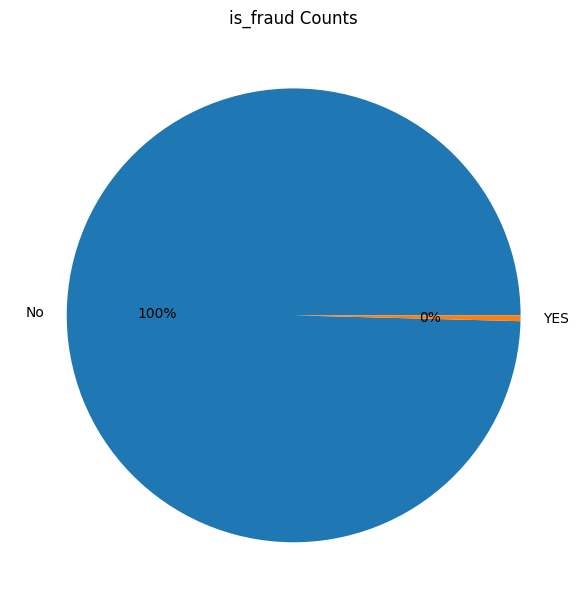

In [18]:
exit_counts = train_data["is_fraud"].value_counts()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Subplot for the pie chart
plt.pie(exit_counts, labels=["No", "YES"], autopct="%0.0f%%")
plt.title("is_fraud Counts")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

TRAIN THE MODEL

In [19]:
X = train_data.drop(columns=["is_fraud"], inplace = False)
Y = train_data["is_fraud"]

In [20]:
model = SVC()
model.fit(X, Y)

SVC()

In [21]:
model.score(X, Y)

0.9958995386981035

TEST MODEL

In [40]:
test_data = pd.read_csv("/content/fraudTest.csv")
test_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472875,472875,2020-12-13 21:55:15,4178097073221156,fraud_Schoen-Quigley,kids_pets,26.88,Jill,Flores,F,639 Cruz Islands,...,41.9488,-86.4913,3104,"Horticulturist, commercial",1981-03-29,9677e0136cb648b5da07eac98e6b924d,1.386972e+09,42.362272,-86.113059,0.0
472876,472876,2020-12-13 21:55:16,6506116513503136,fraud_Padberg-Sauer,home,111.85,Kimberly,Rice,F,63991 Destiny Rue Apt. 651,...,32.2768,-95.3031,144160,Sports development officer,1984-05-04,3e551c4336979bdbab8343156817f88e,1.386972e+09,32.713703,-94.805653,0.0
472877,472877,2020-12-13 21:55:16,3564839259330465,fraud_Kling-Ernser,entertainment,37.96,Robert,Ashley,M,1250 Christopher Prairie Suite 016,...,38.0460,-122.1866,198,Armed forces training and education officer,1959-03-31,d8fc37a98e46072bb19ed7f9f6bac898,1.386972e+09,37.145175,-121.677340,0.0
472878,472878,2020-12-13 21:55:24,6011367958204270,fraud_Stoltenberg-Beatty,shopping_pos,2.35,Tammy,Ayers,F,1652 James Mews,...,41.2419,-81.7453,7646,Medical sales representative,1988-09-15,d18377dff1ca6cbec505c59cbc06dc1f,1.386972e+09,42.034483,-82.001533,0.0


In [41]:
test_data.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [42]:
test_data.drop(columns=['Unnamed: 0','cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace=True)
test_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,M,33.9659,-80.9355,333497,Mechanical engineer,1.371817e+09,33.986391,-81.200714,0.0
1,fraud_Sporer-Keebler,personal_care,29.84,F,40.3207,-110.4360,302,"Sales professional, IT",1.371817e+09,39.450498,-109.960431,0.0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,40.6729,-73.5365,34496,"Librarian, public",1.371817e+09,40.495810,-74.196111,0.0
3,fraud_Haley Group,misc_pos,60.05,M,28.5697,-80.8191,54767,Set designer,1.371817e+09,28.812398,-80.883061,0.0
4,fraud_Johnston-Casper,travel,3.19,M,44.2529,-85.0170,1126,Furniture designer,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
472875,fraud_Schoen-Quigley,kids_pets,26.88,F,41.9488,-86.4913,3104,"Horticulturist, commercial",1.386972e+09,42.362272,-86.113059,0.0
472876,fraud_Padberg-Sauer,home,111.85,F,32.2768,-95.3031,144160,Sports development officer,1.386972e+09,32.713703,-94.805653,0.0
472877,fraud_Kling-Ernser,entertainment,37.96,M,38.0460,-122.1866,198,Armed forces training and education officer,1.386972e+09,37.145175,-121.677340,0.0
472878,fraud_Stoltenberg-Beatty,shopping_pos,2.35,F,41.2419,-81.7453,7646,Medical sales representative,1.386972e+09,42.034483,-82.001533,0.0


In [45]:
test_data['merch_lat'].fillna(test_data['merch_lat'].mode()[0], inplace=True)
test_data['merch_long'].fillna(test_data['merch_long'].mode()[0], inplace=True)
test_data['is_fraud'].fillna(test_data['is_fraud'].mode()[0], inplace=True)
test_data['unix_time'].fillna(test_data['unix_time'].mode()[0], inplace=True)

In [46]:
test_data.isna().sum()

merchant      0
category      0
amt           0
gender        0
lat           0
long          0
city_pop      0
job           0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

In [47]:
encoder = LabelEncoder()
test_data["merchant"] = encoder.fit_transform(test_data["merchant"])
test_data["category"] = encoder.fit_transform(test_data["category"])
test_data["gender"] = encoder.fit_transform(test_data["gender"])
test_data["job"] = encoder.fit_transform(test_data["job"])

In [48]:
test_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,319,10,2.86,1,33.9659,-80.9355,333497,275,1.371817e+09,33.986391,-81.200714,0.0
1,591,10,29.84,0,40.3207,-110.4360,302,392,1.371817e+09,39.450498,-109.960431,0.0
2,611,5,41.28,0,40.6729,-73.5365,34496,259,1.371817e+09,40.495810,-74.196111,0.0
3,222,9,60.05,1,28.5697,-80.8191,54767,407,1.371817e+09,28.812398,-80.883061,0.0
4,292,13,3.19,1,44.2529,-85.0170,1126,196,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
472875,565,7,26.88,0,41.9488,-86.4913,3104,221,1.386972e+09,42.362272,-86.113059,0.0
472876,471,6,111.85,0,32.2768,-95.3031,144160,418,1.386972e+09,32.713703,-94.805653,0.0
472877,323,0,37.96,1,38.0460,-122.1866,198,33,1.386972e+09,37.145175,-121.677340,0.0
472878,601,12,2.35,0,41.2419,-81.7453,7646,279,1.386972e+09,42.034483,-82.001533,0.0


In [52]:
X_test = test_data.drop(columns=["is_fraud"], inplace = False)
Y_test = test_data["is_fraud"]

In [53]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [54]:
accuracy = accuracy_score(test_data['is_fraud'],y_pred)
accuracy

0.995645829808831